### Polynomial Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import  mean_squared_error

In [2]:
# Generate Synthetic Data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X**2 + 2 + np.random.randn(100, 1) * 5

In [3]:
# transform Features to Polynomials
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [4]:
# Fit Polyomial Regression
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

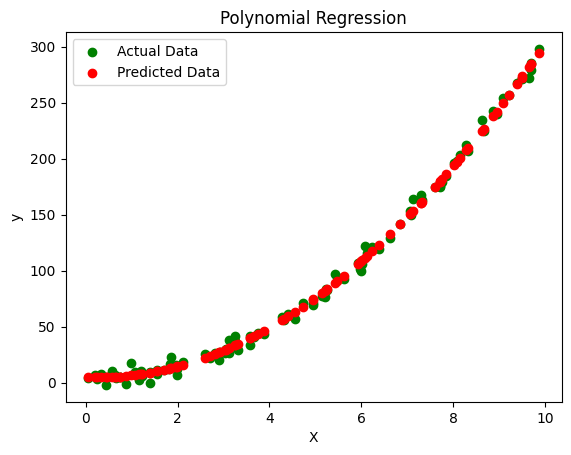

In [5]:
# PLot the Resukts
plt.scatter(X, y, color="green", label="Actual Data")
plt.scatter(X, y_pred, color="red", label="Predicted Data")
plt.title("Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [6]:
# Evaluate The Model
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  19.429841658755908


### Regularization - Lasso and Ridge

In [8]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

In [9]:
# Generate Synthetic Data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X**2 + 2 + np.random.randn(100, 1) * 5

# transform Features to Polynomials
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly,
                y,
                test_size=0.2,
                random_state=42)

In [13]:
# Fit the Model 
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

ridge_prediction = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)

# Lasso Predictions
lasso_prediction = lasso_model.predict(X_test)

In [14]:
# Evaluate Ridge
ridge_mse = mean_squared_error(y_test, ridge_prediction)
print("Ridge Regression MSE: ", ridge_mse)

# Evaluate Lasso
lasso_mse = mean_squared_error(y_test, lasso_prediction)
print("Lasso Regression MSE: ",lasso_mse)

Ridge Regression MSE:  15.893697476980938
Lasso Regression MSE:  16.72881857565236


### Excercises

In [19]:
# Ex 01: Implement Polynomial regression and Visualise the fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading California Housing Dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Check Data Head
df.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526


In [21]:
# Select Feature (Median Income) and Target (Median House Value)
X = df[["MedInc"]]
y = df[["MedHouseVal"]]

# Transform Feature to Polynomial Feature
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit Polynomial Regreassion
model = LinearRegression()
model.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


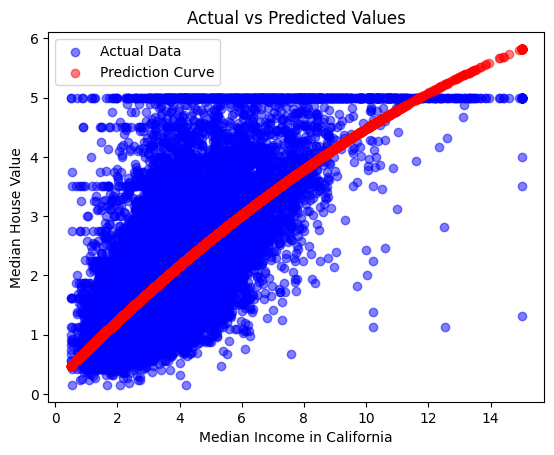

In [25]:
# Make Predictions
y_pred = model.predict(X_poly)

# Plot Actual vs Predicted Values
plt.scatter(X, y, color="blue", label="Actual Data", alpha=0.5)
plt.scatter(X, y_pred, color="red", label="Prediction Curve", alpha=0.5)
plt.title("Actual vs Predicted Values")
plt.xlabel("Median Income in California")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

In [27]:
# Ex 02: Use Lasso and Ridge
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

# Loading California Housing Dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Check Data Head
df.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526


In [28]:
# Select Feature (Median Income) and Target (Median House Value)
X = df[["MedInc"]]
y = df[["MedHouseVal"]]

# Transform Feature to Polynomial Feature
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [32]:
# Ridge Regression
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [33]:
# Mean Squared Error - Ridge
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print("Mean Square Error (Ridge Regression): ", ridge_mse)

# Mean Squared Error - Lasso
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
print("Mean Square Error (Lasso Regression): ", lasso_mse)

Mean Square Error (Ridge Regression):  0.703272792117919
Mean Square Error (Lasso Regression):  0.7211823140579732


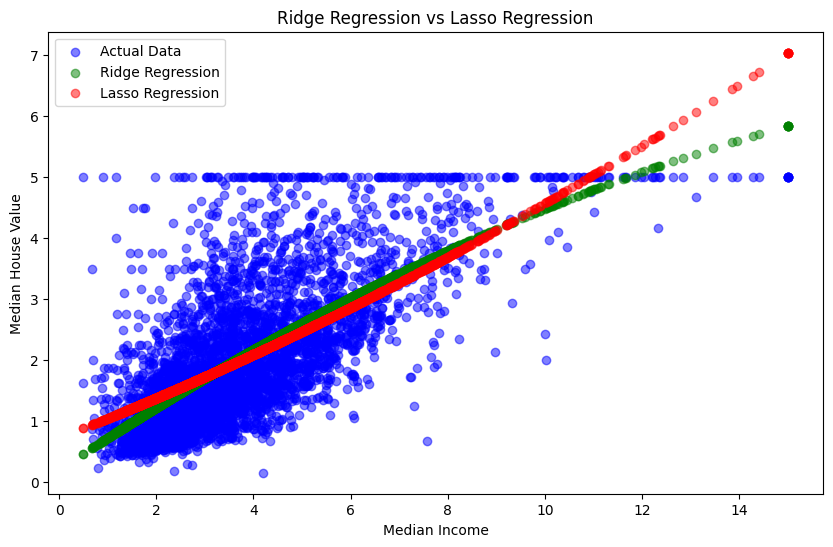

In [34]:
# Visualise the Ridge Regresion vs Lasso Regresion
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color="blue", label="Actual Data", alpha=0.5)
plt.scatter(X_test[:, 0], y_pred_ridge, color="green", label="Ridge Regression", alpha=0.5)
plt.scatter(X_test[:, 0], y_pred_lasso, color="red", label="Lasso Regression", alpha=0.5)
plt.title("Ridge Regression vs Lasso Regression")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.show()